In [2]:
!pip install seaborn

     |████████████████████████████████| 292 kB 8.1 MB/s            


In [3]:
#Import helper libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from ipywidgets import interact, interactive, fixed, interact_manual

In [6]:
data = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
data= pd.read_csv(data)

In [7]:
data.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [8]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

In [9]:
#identify missing data
data=data.replace('?',np.NaN)
data

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


In [10]:
missing_data = data.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
missing_data = data.isnull()
missing_data.head(10)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
#check data type
data.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

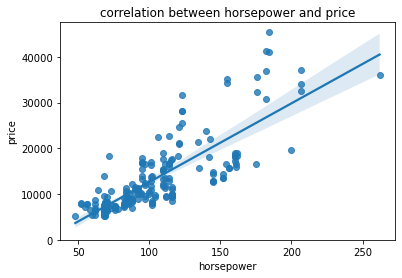

In [28]:
#Checking for positive correlation between horsepower and price
sns.regplot(x = 'horsepower', y = 'price', data = data)
plt.ylim(0,) # y axis starts from zero
plt.title("correlation between horsepower and price")
plt.show()

<h2> Simple linear regression </h2>

In [16]:
lm = LinearRegression()

In [29]:
#Using engine-size to predict the price of the car
X = data[['horsepower']]
Y = data['price']

In [30]:
#fitting the model using engine-size
lm.fit(X,Y)

LinearRegression()

In [31]:
#prediction
Yhat=lm.predict(X)
Yhat[0:5]  

array([14514.76823442, 14514.76823442, 21918.64247666, 12965.1201372 ,
       15203.50072207])

<b> Intercept Value </b>

In [32]:
#Intercept value
lm.intercept_

-4597.558297892916

<b> Gradient Value </b>

In [33]:
#Gradient value
lm.coef_

array([172.18312191])

In [26]:
#Linear model using engine size as independent variable and price as dependent variable
lm0 = LinearRegression()

lm0.fit( data[['engine-size']], data['price'])

print("Value of the intercept \n {}".format(lm0.intercept_))
print("Value of the Slope \n {}".format(lm0.coef_))
print("\n Final estimated linear model")
print("Yhat=-7963.34 + 166.86*X")
print("Price=-7963.34 + 166.86*engine-size")

Value of the intercept 
 -7963.338906281042
Value of the Slope 
 [166.86001569]

 Final estimated linear model
Yhat=-7963.34 + 166.86*X
Price=-7963.34 + 166.86*engine-size


<b> R Square Value </b>

In [35]:
# Finding R_Squared value
X = data[['horsepower']]
Y = data['price']
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.6554109795391572


<b> Mean Squared Error </b>

In [37]:
from sklearn.metrics import mean_squared_error

In [38]:
#Fidning the Mean Squared Error
Yhat=lm.predict(X)
mse = mean_squared_error(data['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  21654544.398254286


<h2> Multiple Linear Regression </h2>

<b> Intercept value and gradient values </b>

In [41]:
#Multiple Linear model using horsepower, curb-weight, engine-size, highway-mpg as predictor variables against price
lm1 = LinearRegression() # creating regression variable
Z = data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']] # extracting multiple independent variables

#Fit the linear model using the four above-mentioned variables.
lm1.fit(Z, data['price'])
print("Value of the intercept \n {}".format(lm1.intercept_))
print("Values of the coefficients (b1, b2, b3, b4) \n {}".format(lm1.coef_))
print("\n Final estimated linear model")
print(f"\n Price = {lm1.intercept_} + {lm1.coef_[0]}*horsepower + {lm1.coef_[1]}*curb-weight + {lm1.coef_[2]}*engine-size + {lm1.coef_[3]}*highway-mpg")

Value of the intercept 
 -15806.62462632922
Values of the coefficients (b1, b2, b3, b4) 
 [53.49574423  4.70770099 81.53026382 36.05748882]

 Final estimated linear model

 Price = -15806.62462632922 + 53.49574422604914*horsepower + 4.707700994613939*curb-weight + 81.53026382122758*engine-size + 36.05748881648596*highway-mpg


In [51]:
#response variable is price, and the predictor variable is normalized-losses and highway-mpg.
lm2 = LinearRegression()
lm2.fit(data[['normalized-losses','highway-mpg']],data['price']) 
print("Value of the intercept \n {}".format(lm2.intercept_))
print("Values of the coefficients (b1, b2, b3, b4) \n {}".format(lm2.coef_))
print("\n Estimated linear model")
print(f"\n Price = {lm2.intercept_} + {lm2.coef_[0]}*normalized-losses  {lm2.coef_[1]}*highway-mpg ")

Value of the intercept 
 38201.31327245728
Values of the coefficients (b1, b2, b3, b4) 
 [   1.49789586 -820.45434016]

 Estimated linear model

 Price = 38201.31327245728 + 1.4978958634133213*normalized-losses  -820.4543401631865*highway-mpg 


<b> R Square value <b>

In [53]:
# Finding R Squared value
lm.fit(Z, data['price'])

print('The R-square is: ', lm.score(Z, data['price']))

The R-square is:  0.8093562806577457


<b> Mean Square Error </b>

In [46]:
#Finding the Mean Square Error of price
Y_predict_multifit = lm.predict(Z)

In [48]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(data['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649
